# Covid19 vs Georgia

Covid 19 is the most talked about thing nowadays. Several days ago the Forbes published an article with name: “The 100 Safest Countries In The World For COVID-19”, https://www.forbes.com/sites/johnkoetsier/2020/06/05/the-100-safest-countries-in-the-world-for-covid-19/#588a232168c5.
In this list Georgia was in 39th place. Surely except Covid19 statistics there are other factors that made modifications in this list but with only virus data I want to response several questions.
1. What is the current status of Georgia against Covid19?
2. How the statistics was changing during time?
3. Compare situation to some other countries which have better position in the Forbes list and they are either neighbor or have comparable population.

The data is taken from github and WHO. 

In [1]:
import requests
import lxml.html as lh
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
def Parse_table(url):
    '''
    Takes URL and returns df from URL table
    '''
    page = requests.get(url)
    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)
    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')
    
    #Create empty list
    col=[]
    i=0
    #For each row, store each first element (header) and an empty list
    for t in tr_elements[0]:
        i+=1
        name=t.text_content()
       # print( '%d:"%s"'%(i,name))
        col.append((name,[]))
    # number of columns of our table    
    N_col = len(col) 
    #Since out first row is the header, data is stored on the second row onwards
    for j in range(1,len(tr_elements)):
        #T is our j'th row
        T=tr_elements[j]
    
        #If row is not of size N_col, the //tr data is not from our table 
        if len(T)!=N_col:
            break
    
        #i is the index of our column
        k=0
    
        #Iterate through each element of the row
        for t in T.iterchildren():
            data=t.text_content() 
            #Check if row is empty
            if k<0:
            #Convert any numerical value to integers
                try:
                    data=int(data)
                except:
                    pass
            #Append the data to the empty list of the i'th column
            col[k][1].append(data)
            #Increment i for the next column
            k+=1
    Dict={title:column for (title,column) in col}
    df=pd.DataFrame(Dict)
    df.head()
    return df

### Dataset

Download the data

There are three different files for: confirmed, recovered and fatal cases. 

In [3]:
url0 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed = pd.read_csv(url0, error_bad_lines=False)
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(url1, error_bad_lines=False)
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths = pd.read_csv(url2, error_bad_lines=False)

In [4]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142


In [5]:
df_confirmed.columns[:5]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20'], dtype='object')

The structure of the data is same in all three files. ['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20' ...] all the dates. The values of date columns corresponds to total number of cases. NOT datected to that date only. So the first non 0 value, correspondes the date of first confirmed case.

If we want to have fare comparison, we need to know, how many days passed after the first confirmed case, so we need the date of the first confirmed case.

In [6]:
df_confirmed['First case date'] = 0

for i in range(0,len(df_confirmed)):
    for j in range(5, len(df_confirmed.columns)):
        if df_confirmed.iloc[i,j] !=0:
            df_confirmed['First case date'][i]=df_confirmed.columns[j]
            break

### 1. Status in Georgia for 14.06.2020

In [7]:
df_Georgia_confirmed =  df_confirmed[df_confirmed['Country/Region']=='Georgia']
df_Georgia_recoverd =  df_recovered[df_recovered['Country/Region']=='Georgia']
df_Georgia_fatal =  df_deaths[df_deaths['Country/Region']=='Georgia']

In [8]:
df_Georgia_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,First case date
119,NaN,Georgia,42.3154,43.3569,0,0,0,0,0,0,...,809,812,818,827,831,843,851,864,879,2/26/20


In [9]:
Geo_population = 3989472
lastindex = len(df_Georgia_recoverd.columns)-1

In [10]:
#number of infected 1M population
df_Georgia_confirmed.iloc[0,lastindex]/Geo_population*1000000

220.3299083186948

In [11]:
df_Georgia_recoverd.iloc[0,lastindex]

704

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
def drawpie(axes, labels, sizes,Title,colors):
    '''
    Input: axes, Title and parameters of pie chart
    '''    
    axes.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,\
        shadow=False, wedgeprops=dict(width=0.5), startangle=90, textprops={'fontsize': 18})
      
    axes.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   
    axes.set_title(Title, fontsize=20)


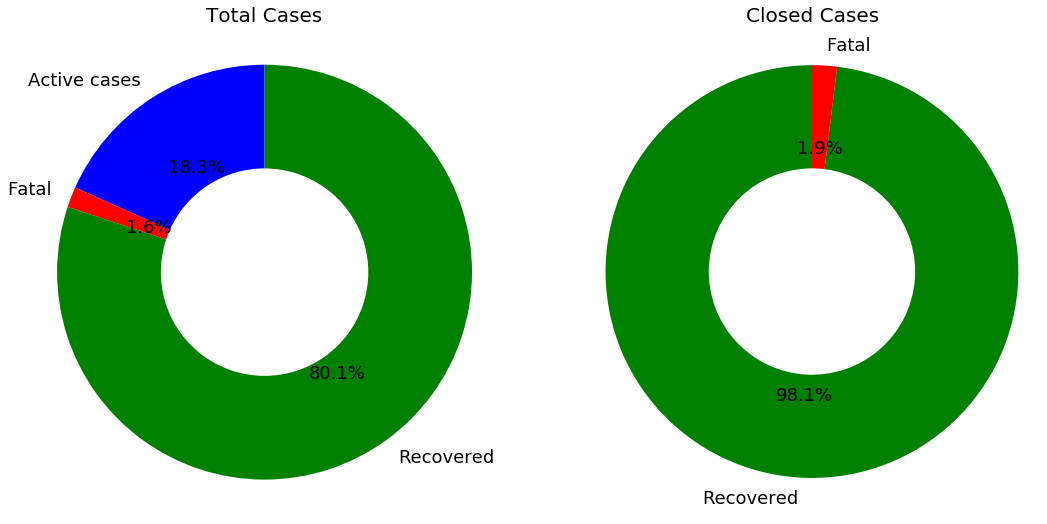

In [13]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(18,9))

labels = ['Active cases', 'Fatal', 'Recovered']
colors = ['Blue', 'Red', 'Green']   
Active_cases = df_Georgia_confirmed.iloc[0,lastindex]-df_Georgia_fatal.iloc[0,lastindex]-df_Georgia_recoverd.iloc[0,lastindex]
sizes_S = [Active_cases, df_Georgia_fatal.iloc[0,lastindex], df_Georgia_recoverd.iloc[0,lastindex]]

drawpie(axes[0],labels,sizes_S,'Total Cases', colors)

labels = [ 'Recovered','Fatal']
colors = [ 'Green', 'Red'] 
sizes_S = [df_Georgia_recoverd.iloc[0,lastindex], df_Georgia_fatal.iloc[0,lastindex]]

drawpie(axes[1],labels,sizes_S,'Closed Cases',colors)

In Georgia Covid 19 first time was confirmed in 26 of February, 2020. Since then passed 110 days. 864 confirmed cases, 216.5 on 1M population. During this time 703 and 14 passed away that is 2% of closed cases.

### Dinamic changes in time

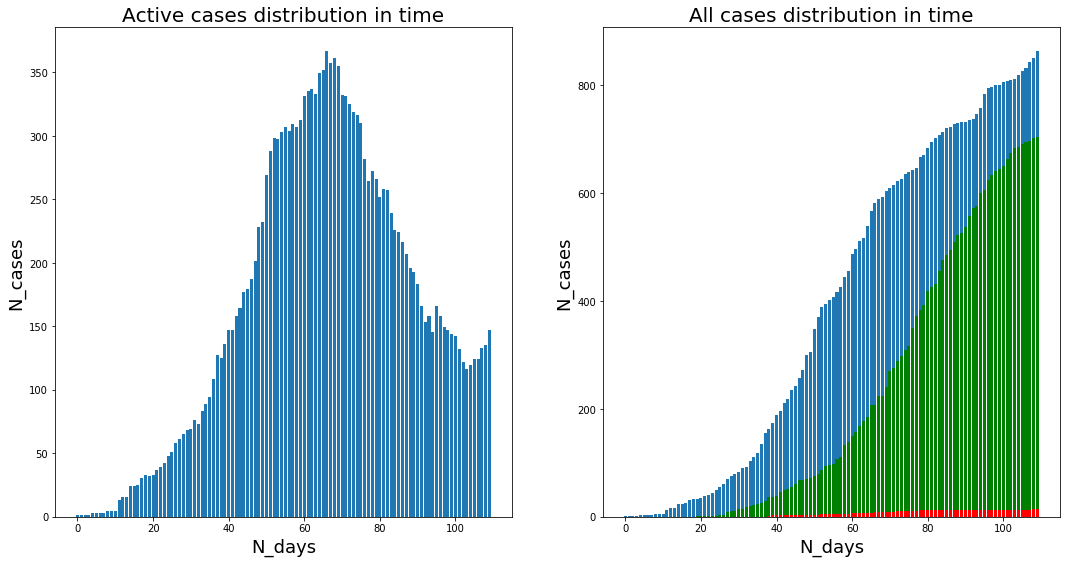

In [14]:
ind = np.arange(df_Georgia_recoverd.iloc[:,39:149].shape[1])
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(18,9))

axes[0].bar(ind,df_Georgia_confirmed.iloc[0,39:149]-df_Georgia_recoverd.iloc[0,39:149]-df_Georgia_fatal.iloc[0,39:149])
axes[0].set_ylabel('N_cases', fontsize=18)
axes[0].set_xlabel('N_days', fontsize=18)
axes[0].set_title('Active cases distribution in time',  fontsize=20)

axes[1].bar(ind, df_Georgia_confirmed.iloc[0,39:149])
axes[1].bar(ind, df_Georgia_recoverd.iloc[0,39:149],color='green')
axes[1].bar(ind, df_Georgia_fatal.iloc[0,39:149],color='red')
axes[1].set_ylabel('N_cases', fontsize=18)
axes[1].set_xlabel('N_days', fontsize=18)
plt.title('All cases distribution in time',  fontsize=20)
plt.show()

The peak of the active cases was during 50th and 80th days but lethal cases didn’t increased in this period. It should be mentioned that maximum number of active cases 361.

### Comparisons

In [15]:
rank= [1, 2, 3, 4, 6, 14, 15, 18, 24, 34, 35, 36, 37, 38, 39] #ranking number from Forbes

population =[ 8651801, 83772567, 9197590, 5848278, 9004150, 5419340, 5791333, 9661322,\
              5540362, 10425009, 1326498, 4106223, 84296986, 4935217, 3989472 ]  #population from WHO

countries = [ 'Switzerland','Germany', 'Israel', 'Singapore', 'Austria', 'Norway',\
              'Denmark', 'Hungary', 'Finland', 'Greece', 'Estonia', 'Croatia', 'Turkey', 'Ireland', 'Georgia']


In [16]:
df = pd.DataFrame(index=range(0,len(rank))) #create a dataframe

In [17]:
df['rank']=rank
df['countries']=countries
df['population']=population

# date of first confirmed case
df['firstdate']=0

# number of confirmed cases for 14.06.2020
df['totalcases'] =0

# number of recovered cases
df['recoverd'] =0

## number of fatal cases
df['fatal'] =0

In [18]:
datecolindex = len(df_confirmed.columns)-1

In [19]:
for i in range(0,len(rank)):
    
    # In Denmark case there are three entries in the dataset. we need last one only, rest two is included in last 
    
    df_c = df_confirmed[df_confirmed['Country/Region']==df.countries.iloc[i]].drop_duplicates(['Country/Region'], keep='last')
    print(df_c.iloc[0,datecolindex])
    df.firstdate.iloc[i] = df_c.iloc[0,datecolindex]
    df.totalcases.iloc[i] = df_c.iloc[0,datecolindex-1]
    df.recoverd.iloc[i] =df_recovered[df_recovered['Country/Region']==df.countries.iloc[i]].drop_duplicates(['Country/Region'], keep='last').iloc[0,datecolindex-1]
    df.fatal.iloc[i] =df_deaths[df_deaths['Country/Region']==df.countries.iloc[i]].drop_duplicates(['Country/Region'], keep='last').iloc[0,datecolindex-1]

2/25/20
1/27/20
2/21/20
1/23/20
2/25/20
2/26/20
2/27/20
3/4/20
1/29/20
2/26/20
2/27/20
2/25/20
3/11/20
2/29/20
2/26/20


In [20]:
N_days = [109, 140, 105, 144, 111, 110, 109, 75, 138, 110, 109, 111, 97, 108, 110] # number of days after first confirmed case

In [21]:
df['N_days']=N_days

In [22]:
df.head(15)

,rank,countries,population,firstdate,totalcases,recoverd,fatal,N_days
0,1,Switzerland,8651801,2/25/20,31131,28900,1939,109
1,2,Germany,83772567,1/27/20,187682,172692,8807,140
2,3,Israel,9197590,2/21/20,19237,15415,302,105
3,4,Singapore,5848278,1/23/20,40818,30366,26,144
4,6,Austria,9004150,2/25/20,17135,16066,678,111
5,14,Norway,5419340,2/26/20,8647,8138,242,110
6,15,Denmark,5791333,2/27/20,12217,11090,598,109
7,18,Hungary,9661322,3/4/20,4076,2485,563,75
8,24,Finland,5540362,1/29/20,7108,6200,326,138
9,34,Greece,10425009,2/26/20,3134,1374,184,110


In [23]:
df['Cases1M_pop']=0 # number of total cases for 1M population

df['activeCases1M_pop']=0 #number of active cases for 1M population

df['Fatalyty']=0 # percentage of fatal cases in closec cases, that is defined as recoverec+fatal 

df['Fatalytytotot']=0 # percentage of fatal cases in total cases

df['totalclosed']=0 #the ratio of closed cases over total cases

for i in range(0,len(df)):
    
    df.activeCases1M_pop.iloc[i] = (df.totalcases.iloc[i]-df.recoverd.iloc[i]-df.fatal.iloc[i])/df.population.iloc[i]*1000000
    df.Cases1M_pop.iloc[i] = df.totalcases.iloc[i]/df.population.iloc[i]*1000000
    df.Fatalyty.iloc[i] = df.fatal.iloc[i]/(df.recoverd.iloc[i]+df.fatal.iloc[i])*100
    df.Fatalytytotot.iloc[i] = df.fatal.iloc[i]/(df.totalcases.iloc[i])*100
    df.totalclosed.iloc[i] = 1- df.activeCases1M_pop.iloc[i]/df.Cases1M_pop.iloc[i]

below are ranking plots, sorted by variable of rank

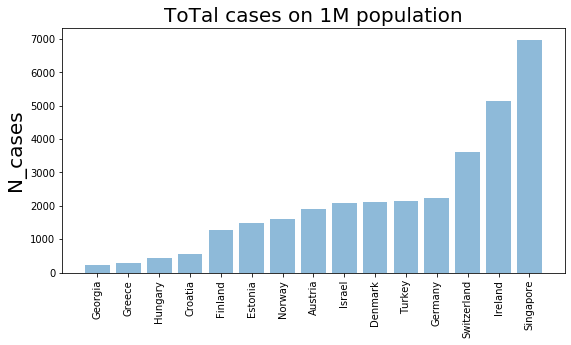

In [24]:
df =df.sort_values(by ='Cases1M_pop')

indexes = list(df.countries)
objects = (indexes[0], indexes[1], indexes[2], indexes[3], indexes[4], indexes[5], indexes[6], indexes[7],\
           indexes[8], indexes[9], indexes[10], indexes[11], indexes[12], indexes[13], indexes[14])
y_pos = np.arange(len(objects))
performance = df.Cases1M_pop

fig = plt.subplots( figsize=(9,4.5))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('N_cases', fontsize =20)
plt.title('ToTal cases on 1M population', fontsize =20)

plt.show()


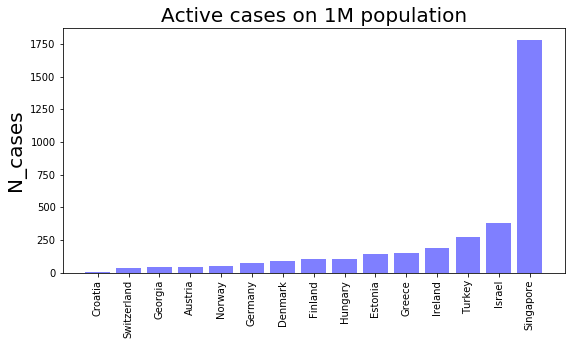

In [25]:
df =df.sort_values(by ='activeCases1M_pop')

indexes = list(df.countries)
objects = (indexes[0], indexes[1], indexes[2], indexes[3], indexes[4], indexes[5], indexes[6], indexes[7],\
           indexes[8], indexes[9], indexes[10], indexes[11], indexes[12], indexes[13], indexes[14])
y_pos = np.arange(len(objects))
performance = df.activeCases1M_pop

fig = plt.subplots( figsize=(9,4.5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'blue')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('N_cases', fontsize =20)
plt.title('Active cases on 1M population', fontsize =20)

plt.show()

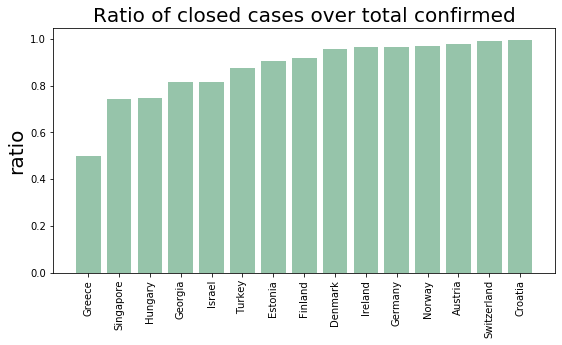

In [26]:
df =df.sort_values(by ='totalclosed')

indexes = list(df.countries)
objects = (indexes[0], indexes[1], indexes[2], indexes[3], indexes[4], indexes[5], indexes[6], indexes[7],\
           indexes[8], indexes[9], indexes[10], indexes[11], indexes[12], indexes[13], indexes[14])
y_pos = np.arange(len(objects))
performance = df.totalclosed

fig = plt.subplots( figsize=(9,4.5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'seagreen')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('ratio', fontsize =20)
plt.title('Ratio of closed cases over total confirmed', fontsize =20)

plt.show()


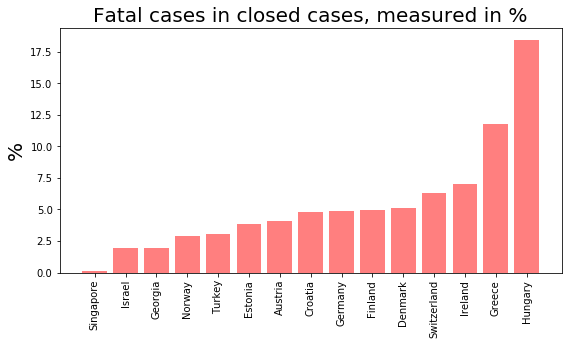

In [27]:
df =df.sort_values(by ='Fatalyty')

indexes = list(df.countries)
objects = (indexes[0], indexes[1], indexes[2], indexes[3], indexes[4], indexes[5], indexes[6], indexes[7],\
           indexes[8], indexes[9], indexes[10], indexes[11], indexes[12], indexes[13], indexes[14])
y_pos = np.arange(len(objects))
performance = df.Fatalyty

fig = plt.subplots( figsize=(9,4.5))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'red')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('%', fontsize =20)
plt.title('Fatal cases in closed cases, measured in %', fontsize =20)

plt.show()

### conclusion

As seen from plots, total cases in Georgia on 1M population is the least, also in some countries active cases are left more, also death rate is much more than in Georgia, but still these countries have better position in Frobes ranking. The Leaders are Switzerland and Germany.

One of the reasons could be the few number total cases. Also health care system and economic situation will be the strongest factors to create this kind of rankings. Overall in fighting against Covid 19, Georgia is in a good track as shown above.